<h1>Whatsapp Messages Processing</h1>

In [143]:
import numpy as np
import pandas as pd
from datetime import date
from stop_words import get_stop_words # python -m pip install stop-words
import string
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
%%time
# Runs in a few (3-4) seconds for a messages file of 44k lines

def get_word_frequencies(file_url, start_date):
    
    # Example message:
    # '22-05-19 15:22 - Neal: Hahaha'

    
    # Determine stop words (words to be removed because they are not interesting)
    stop_words_nltk = get_stop_words('nl')
    stop_words_custom = ['\n','<Media weggelaten>','en']
    stop_words = set(stop_words_nltk) | set(stop_words_custom)

    messages = []               # This list will contain messages as lists of words
    start_to_capture = False    # This boolean will determine whether we are past the 
                                #   start_date and can start to capture messages.

    # Read file line by line
    with open(file_url) as file:
        for line in file:

            # Some messages are just showing that a user has sent an image file; skip these
            if ('<Media weggelaten>' in line):
                continue

            # Extract message contents (split by ':' results in the last elt containing the message)
            message = line.split(':')

            # Try to extract the message date (quick and dirty)
            try:
                # Extract message date
                message_date = np.array(message[0].split(' ')[0].split('-')).astype(int)
                message_date = date(message_date[2]+2000, message_date[1], message_date[0])
            except:
                continue

            # Determine whether we can start to capture the messages
            # (test whether we are past the 'start' date)
            if (start_to_capture == False and message_date >= start_date):
                start_to_capture = True

            # Process the contents of the message if past the start date
            if (start_to_capture):

                # Remove some stuff and split into single words
                message_text = ":".join(message[2:]).replace('\n','').replace(',','').split(' ')
                
                # Add the message as a list of words
                message_text = [word.lower() for word in message_text if word.lower() not in stop_words and len(word) > 0]

                # If the message is still interesting, add it to our list of messages
                if (len(message) > 0):
                    messages.append(message_text)
                    
    # Return a dictionary-like object containing words and their frequencies 
    #   Warning: not sorted. Use the method .most_common() to obtain a sorted of the data (see code below))
    return FreqDist(word for message in messages for word in message)


CPU times: user 3.04 s, sys: 67.8 ms, total: 3.11 s
Wall time: 3.65 s


<h3>Obtain frequencies</h3>

In [229]:
file_url = '/Users/jan/Downloads/WhatsApp-chat met Ægir.txt'

start_date = date(2020, 3, 12) # Format: Y,M,D
frequencies_postlockdown = get_word_frequencies(file_url, start_date)

start_date = date(1970,1,1)
frequencies_overall = get_word_frequencies(file_url, start_date)

<h3>Plot top 10 in lockdown period</h3>

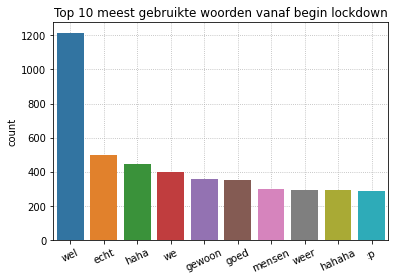

In [227]:

# Post Corona (set filter date in cell above)
top_k = 10
frequencies_common = frequencies_postlockdown.most_common()
frequencies_common = {'words': [word for (word,_) in frequencies_common[:top_k]], 
                                 'freqs': [freq for (_,freq) in frequencies_common[:top_k]]}

fig = sns.barplot(x=frequencies_common['words'],y=frequencies_common['freqs'],zorder=4)
fig.set_title('Top 10 meest gebruikte woorden vanaf begin lockdown')
plt.ylabel('count')
plt.xticks(rotation=25)
plt.grid(linestyle=":")
plt.savefig('aegir/post_lockdown.pdf')

<h4>Save words that were used only once in this period to disk</h4>

In [189]:
# Words that are used only once
once_words = np.array([str(word) for (word,freq) in frequencies_postcorona.most_common() if freq==1])
pd.DataFrame(once_words).to_csv('aegir/once_words_post_lockdown.txt', header=None, index=None)

<h3>Plot top 10 overall</h3>

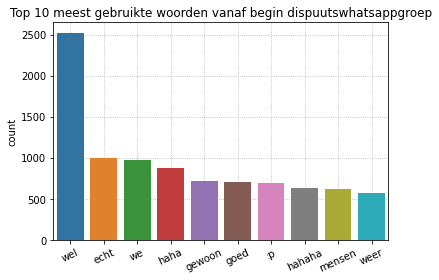

In [225]:

# Over all time (set filter date in cell above)
top_k = 10
frequencies_common = frequencies_overall.most_common()
frequencies_common = {'words': [word for (word,_) in frequencies_common[:top_k]], 
                                 'freqs': [freq for (_,freq) in frequencies_common[:top_k]]}

fig = sns.barplot(x=frequencies_common['words'],y=frequencies_common['freqs'],zorder=4)
fig.set_title('Top 10 meest gebruikte woorden vanaf begin dispuutswhatsappgroep')
plt.ylabel('count')
plt.xticks(rotation=25)
plt.grid(linestyle=":")
plt.savefig('aegir/overall.pdf')

<h4>Show words that occur within a certain frequency window</h4>

In [ ]:
# Show words that occur within a certain frequency window
min_freq = 1
max_freq = 12
words = np.array([(word,freq) for (word,freq) in frequencies_postcorona.most_common() if freq>=min_freq and freq<=max_freq])
for w,f in words:
    print(w,f)